## Data Preparation and Exploration

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [83]:
df1=pd.read_csv(r'C:\Users\Kuntal\Desktop\UGP\UGP\UGP_Data_1.csv')
df2=pd.read_csv(r'C:\Users\Kuntal\Desktop\UGP\UGP\UGP_Data_2.csv')

In [84]:
df1.head(2)

,log(shear rate) in s^-1,Polymer conc(wt%),NaCl concentration(wt%),Ca+2 concentration(wt%),Temperature(in celsius),log(viscosity) in cP
0,0.010415,0.3,0.1,0.0,25,2309.56
1,0.022561,0.3,0.1,0.0,25,2298.77


In [85]:
df2.head(2)

,log(shear rate) in s^-1,Polymer conc(wt%),NaCl concentration(wt%),Ca+2 concentration(wt%),Temperature(in celsius),log(viscosity) in cP
0,0.01,0.3,0.1,0,25,2500
1,0.01,0.2,0.1,0,25,800


In [86]:
#combine above two dataframes (df1 and df2) to a single datafrmae
df=pd.concat([df1,df2])
df.reset_index(inplace=True,drop=True)

In [87]:
print(df1.shape)
print(df2.shape)
print(df.shape)

(420, 6)
(250, 6)
(670, 6)


### checking for missing values

In [89]:
for fe in df.columns:
    print('{} : {}% missing values'.format(fe,df[fe].isnull().mean()*100))

log(shear rate) in s^-1 : 1.1940298507462688% missing values
Polymer conc(wt%) : 1.1940298507462688% missing values
NaCl concentration(wt%) : 0.0% missing values
Ca+2 concentration(wt%) : 1.1940298507462688% missing values
Temperature(in celsius) : 1.1940298507462688% missing values
log(viscosity) in cP : 1.1940298507462688% missing values


In [90]:
#so there are some weired rows in dataframe see below cell

In [91]:
df[440:450]

,log(shear rate) in s^-1,Polymer conc(wt%),NaCl concentration(wt%),Ca+2 concentration(wt%),Temperature(in celsius),log(viscosity) in cP
440,1000,0.3,0.1,0,25,15
441,1000,0.2,0.1,0,25,12
442,1000,0.1,0.1,0,25,6
443,1000,0.05,0.1,0,25,5
444,NaN,NaN,case2,NaN,NaN,NaN
445,log(shear rate) in s^-1,Polymer conc(wt%),NaCl concentration(wt%),Ca+2 concentration(wt%),Temperature(in celsius),log(viscosity) in cP
446,0.01,0.3,1,0,25,150
447,0.01,0.2,1,0,25,40
448,0.01,0.1,1,0,25,10
449,0.01,0.05,1,0,25,4


In [92]:
#dropping unwanted rows which got generated while combining and NaN value rows

In [93]:
df=df[df['log(viscosity) in cP'] != 'log(viscosity) in cP']
df.dropna(inplace=True)

In [94]:
print(df.dtypes)

log(shear rate) in s^-1    object
Polymer conc(wt%)          object
NaCl concentration(wt%)    object
Ca+2 concentration(wt%)    object
Temperature(in celsius)    object
log(viscosity) in cP       object
dtype: object


In [95]:
# convert this object data type to float or integer for visualization

In [96]:
df=df.astype('float64')

In [97]:
df.dtypes

log(shear rate) in s^-1    float64
Polymer conc(wt%)          float64
NaCl concentration(wt%)    float64
Ca+2 concentration(wt%)    float64
Temperature(in celsius)    float64
log(viscosity) in cP       float64
dtype: object

### Visualizing correlation between variables

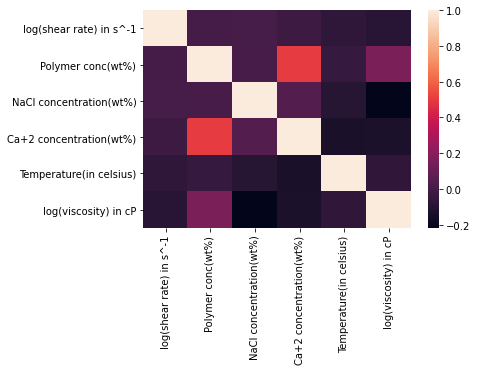

In [98]:
sns.heatmap(df.corr())

### distribution of individual feature values

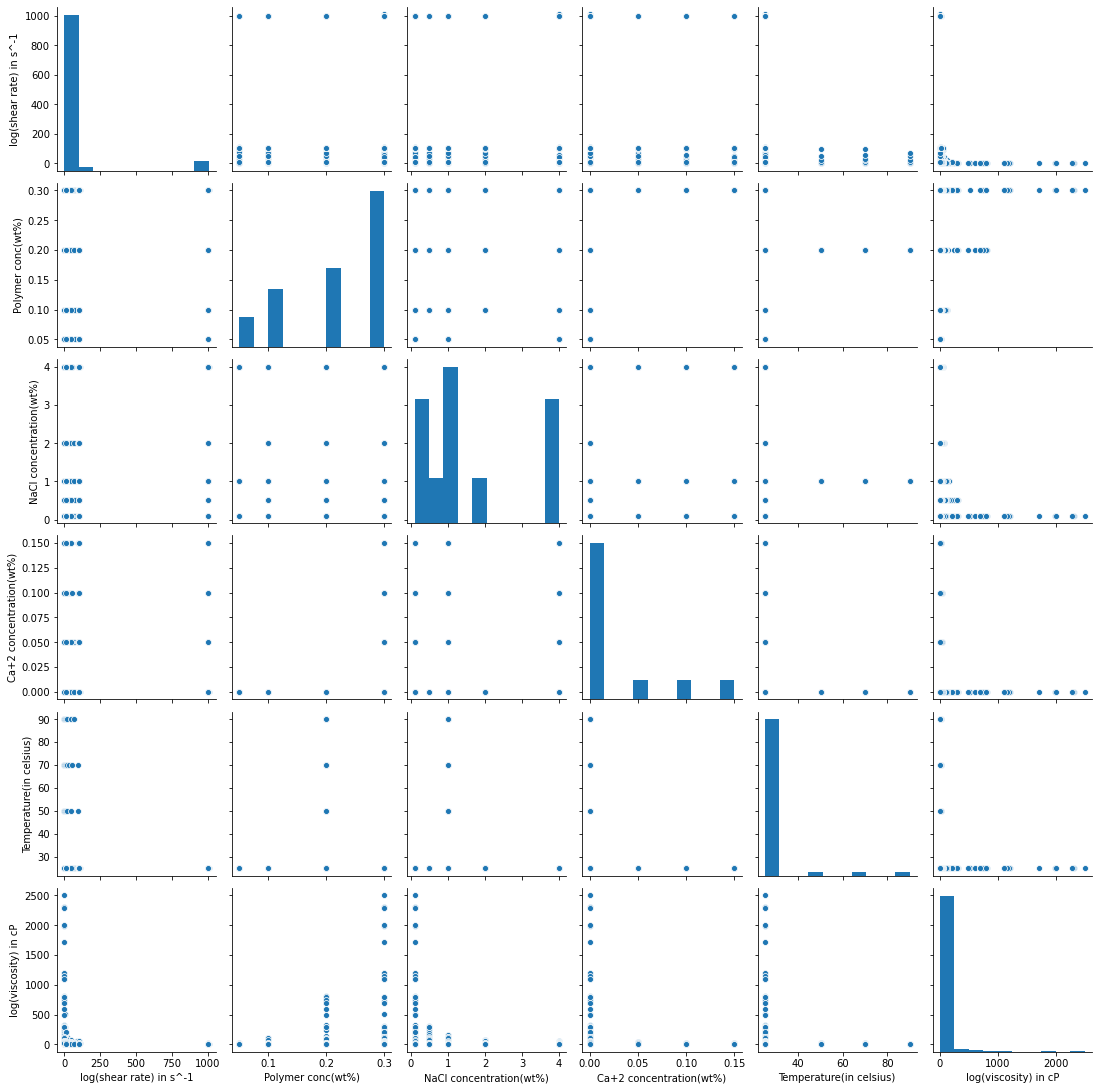

In [99]:
sns.pairplot(df)

##### Not much insight can be drawn from visualization of individual features as in many of them values are quite discrete

### checking for outliers

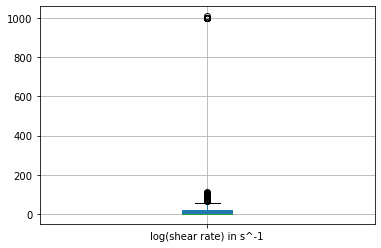

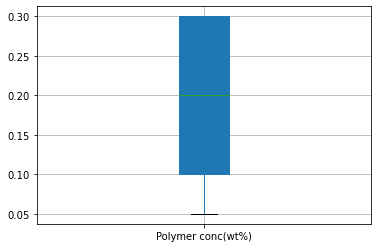

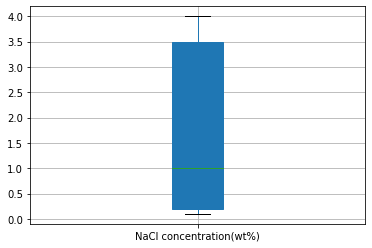

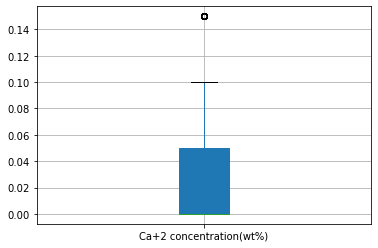

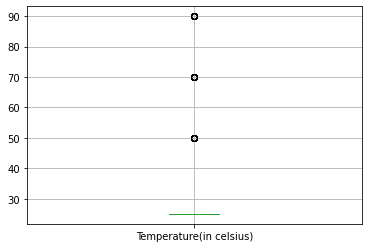

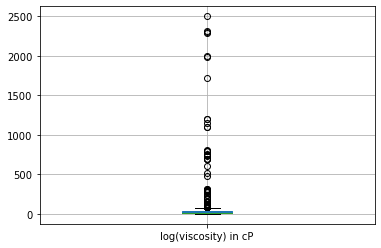

In [100]:
for fe in df.columns:
    df.boxplot(fe, patch_artist=True)
    plt.show()

##### Thought there are a lot of outliers in values but as we are already having vary little data points so we will not perform outlier removal

In [101]:
df.to_csv('Data.csv',index=False)